In [154]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [155]:
angle_threshold = 24
velocity_threshold = 2
angular_velocity_threshold = 2

In [156]:
# def biphasic_square(duration, sampling_rate, interpulse_duration, intrapulse_duration, pulse_duration, voltage_amp = 150e-3):
#     # x is a frequency in Hz, output is a nparray of float voltage values in V
#     total_samples = int(duration * sampling_rate)
#     interpulse_samples = int(interpulse_duration * sampling_rate)
#     intrapulse_samples = int(intrapulse_duration * sampling_rate)
#     pulse_samples = int(pulse_duration * sampling_rate)
#     # one period is: up pulse, intra, down pulse, inter
#     period_sample = 2 * pulse_samples + intrapulse_samples + interpulse_samples
#     waveform = np.zeros(total_samples)


#     print(f"total samples: {total_samples}")
#     print(f"pulse_samples: {pulse_samples}")
#     print(f"intrapulse_samples: {intrapulse_samples}")
#     print(f"interpulse samples: {interpulse_samples}")
#     for i in range(0, total_samples, period_sample):
#         up_pulse_end = i + pulse_samples
#         down_pulse_start = up_pulse_end + intrapulse_samples
#         waveform[i: up_pulse_end] = voltage_amp
#         waveform[down_pulse_start: down_pulse_start + pulse_samples] = -1 * voltage_amp
#     return waveform    

In [157]:
# out = biphasic_square(20, 100, 4, 1, 2)
# plt.plot(out)

In [158]:
# def angle_to_wave(angle, total_duration=20, sampling_rate=100, interpulse_fraction=0.66):
#     # x = 36/(2 * angle_threshold) * angle + 22
#     #TODO: include the pre-processing
#     x = angle
#     # the angle range will be (-12, 12), so we will linear map to (4 Hz, 40 Hz)
#     # the linear eq is 1.5x + 22
#     freq = 1.5 * x + 22
#     print(f"frequency in Hz: {freq}")
#     period_duration = 1 / freq
#     interpulse_duration = interpulse_fraction * period_duration
#     intrapulse_duration = interpulse_duration / 3
#     pulse_duration = (period_duration - interpulse_duration - intrapulse_duration) / 2
#     print(f"Period: {period_duration}, Inter: {interpulse_duration}, Pulse: {period_duration}, Intra: {intrapulse_duration}")
#     return biphasic_square(total_duration, sampling_rate, interpulse_duration, intrapulse_duration, pulse_duration)

In [159]:
# out1 = angle_to_wave(0)
# plt.plot(out1)

In [66]:
# def ang_vec_to_wave(ang_vec, total_duration=20, sampling_rate=100, interpulse_fraction=2/3, intrapulse_duration=1):
#     # x = 36/(2 * velocity_threshold) * ang_vec + 22
#     x = ang_vec
#     # the angular velocity range is (-inf, inf), but is most likely (-2, 2)
#     # so we will linear map (-2, 2) -> (4 Hz, 40 Hz) (values outside range will just be low/high freqs)

#     # the linear eq is simply 9x + 22
#     freq = 9 * x + 22
#     print(f"frequency in Hz: {freq}")
#     period_duration = 1 / freq
#     interpulse_duration = interpulse_fraction * period_duration
#     pulse_duration = (period_duration - interpulse_duration - intrapulse_duration) / 2
#     print(f"Period: {period_duration}, Inter: {interpulse_duration}, Pulse: {period_duration}")
#     return biphasic_square(total_duration, sampling_rate, interpulse_duration, intrapulse_duration, pulse_duration)    

In [160]:

def angle_to_wave(angle, duration, sampling_rate=500, voltage_amp = 150,duty_frac=0.1, intra_duration = 0.02):
    t = np.linspace(0, duration, sampling_rate) # 500Hz sampling rate
    # for now, angle (-12, 12) maps linearly to (4, 40)
    square_wave_freq = 1.5 * angle + 22 # needed to create 5Hz square wave

    out1 = voltage_amp/2 * (sp.signal.square(2 * np.pi * square_wave_freq * t, duty=duty_frac) + 1)
    out2 = -voltage_amp/2 * (sp.signal.square(2 * np.pi * square_wave_freq * t, duty=duty_frac) + 1)
    intra_sample = int(intra_duration * sampling_rate)
    shifted_out2 = np.append(np.zeros(intra_sample), out2)[:len(out2)]
    ret = shifted_out2 + out1
    plt.plot(shifted_out2 + out1)
    return ret

In [161]:
def ang_vec_to_wave(ang_vec, duration, sampling_rate=500, voltage_amp = 150,duty_frac=0.1, intra_duration = 0.02):
    t = np.linspace(0, duration, sampling_rate) # 500Hz sampling rate
    # for now, angle (-12, 12) maps linearly to (4, 40)
    square_wave_freq = 9 * ang_vec + 22 # needed to create 5Hz square wave

    out1 = voltage_amp/2 * (sp.signal.square(2 * np.pi * square_wave_freq * t, duty=duty_frac) + 1)
    out2 = -voltage_amp/2 * (sp.signal.square(2 * np.pi * square_wave_freq * t, duty=duty_frac) + 1)
    intra_sample = int(intra_duration * sampling_rate)
    shifted_out2 = np.append(np.zeros(intra_sample), out2)[:len(out2)]
    ret = shifted_out2 + out1
    plt.plot(shifted_out2 + out1)
    return ret

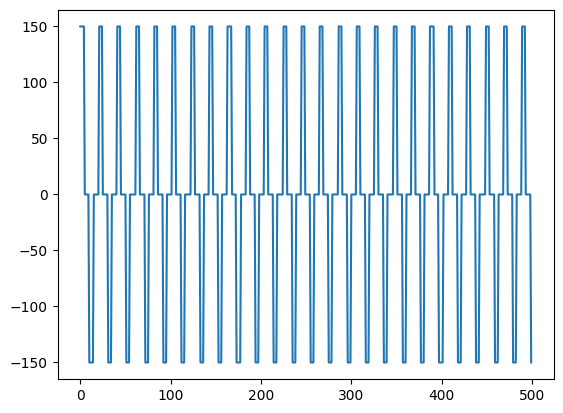

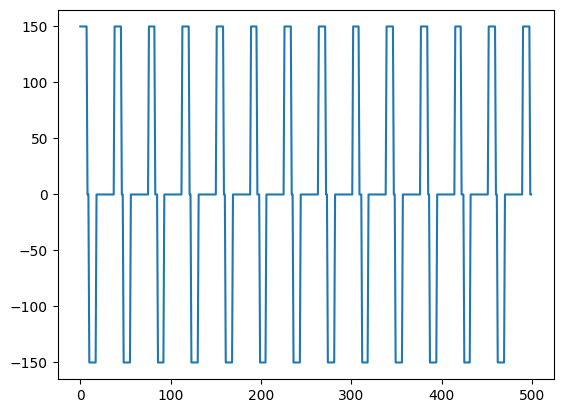

In [166]:
a = ang_vec_to_wave(3, 0.5, 500, 150, 0.2, 0.02)
plt.show()
b = ang_vec_to_wave(0.5, 0.5, 500, 150, 0.2, 0.02)